# 📘 Section 1: Creating, Reading and Writing

## 1. Creating, Reading and Writing
You can't work with data if you can't read it. Let's start with basic creation and loading of data.
We'll also use the Titanic dataset to practice.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
# Load Titanic dataset from Seaborn or URL
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(url)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.shape

(891, 12)

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic_df['Survived'].value_counts()

,count
Survived,
0,549
1,342


# 📘 Section 2: Indexing, Selecting & Assigning

## 2. Indexing, Selecting & Assigning
Select specific rows, columns, and assign values easily.

In [ ]:
# Select a column
titanic_df['Name'].head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


In [ ]:
# Select a row by index
titanic_df.loc[0]

,0
PassengerId,1
Survived,0
Pclass,3
Name,"Braund, Mr. Owen Harris"
Sex,male
Age,22.0
SibSp,1
Parch,0
Ticket,A/5 21171
Fare,7.25


In [ ]:
# Assign new column
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
titanic_df[['Name', 'FamilySize']].head()

,Name,FamilySize
0,"Braund, Mr. Owen Harris",2
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2
2,"Heikkinen, Miss. Laina",1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2
4,"Allen, Mr. William Henry",1


# 📘 Section 3: Summary Functions and Maps

## 3. Summary Functions and Maps
Use summary stats and transformations to extract insights.

In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


In [ ]:
# Use map to transform data
titanic_df['SexNumeric'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df[['Sex', 'SexNumeric']].head()

,Sex,SexNumeric
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


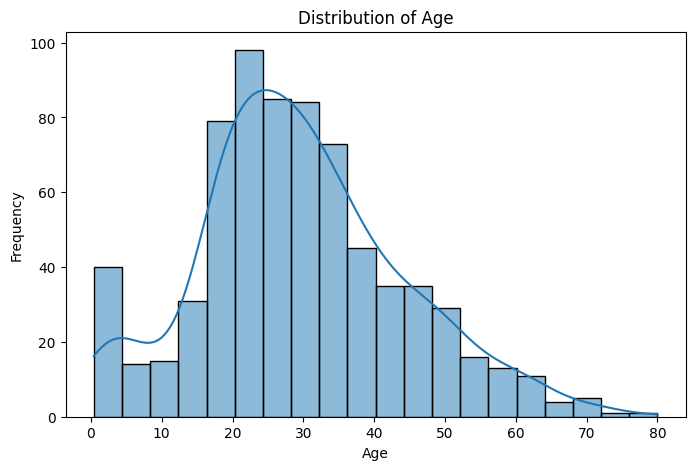

In [ ]:
# 📊 Visualization: Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(titanic_df['Age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 📘 Section 4: Grouping and Sorting

## 4. Grouping and Sorting
Group similar data and sort values to analyze better.

In [ ]:
# Sorting by Fare
titanic_df.sort_values('Fare').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,SexNumeric
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,1,0
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,1,0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,1,0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,1,0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,1,0


In [ ]:
# Desc Sort by Fare
titanic_df.sort_values('Fare', ascending=False)[['Name', 'Fare']].head()

,Name,Fare
679,"Cardeza, Mr. Thomas Drake Martinez",512.3292
258,"Ward, Miss. Anna",512.3292
737,"Lesurer, Mr. Gustave J",512.3292
88,"Fortune, Miss. Mabel Helen",263.0000
438,"Fortune, Mr. Mark",263.0000


In [ ]:
# Grouping by Pclass and calculating survival rate
titanic_df.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


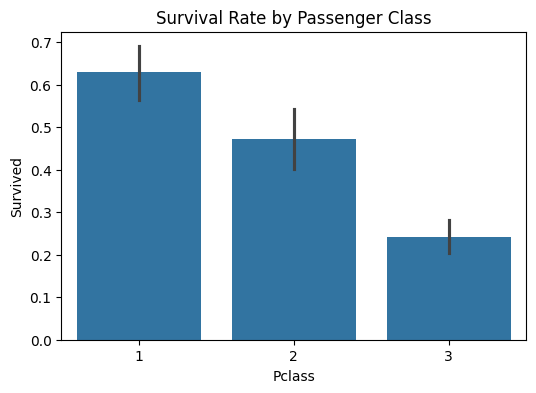

In [ ]:
# 📊 Visualization: Survival Rate by Class
plt.figure(figsize=(6,4))
sns.barplot(data=titanic_df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.show()

# 📘 Section 5: Data Types and Missing Values

## 5. Data Types and Missing Values
Identify and clean problematic values.

In [ ]:
print(titanic_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
FamilySize       int64
SexNumeric       int64
dtype: object


In [ ]:

# Check for missing values
titanic_df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Fill missing Age with mean
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

<ipython-input-20-724673730>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)


In [ ]:
# Fill Embarked with Mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

<ipython-input-21-844139714>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)


In [ ]:
titanic_df.drop('Cabin', axis=1, inplace=True)

In [ ]:
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# 📘 Section 6: Renaming and Combining

## 6. Renaming and Combining
Rename columns and combine multiple dataframes.

In [ ]:
# Rename 'Sex' to 'Gender'
titanic_df.rename(columns={'Sex': 'Gender'}, inplace=True)

In [ ]:
# Combine with a new DataFrame (simulated example)
extra_passenger = pd.DataFrame({
    'PassengerId': [1000],
    'Survived': [0],
    'Pclass': [3],
    'Name': ['Test Passenger'],
    'Gender': ['male'],
    'Age': [25],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [7.25]
})
titanic_df = pd.concat([titanic_df, extra_passenger], ignore_index=True)
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,SexNumeric
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,S,4.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C,1.0,0.0
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,Q,1.0,0.0
891,1000,0,3,Test Passenger,male,25.000000,0,0,NaN,7.25,NaN,NaN,NaN
892,1000,0,3,Test Passenger,male,25.000000,0,0,NaN,7.25,NaN,NaN,NaN


# 📘 Extra Section: API Data (JSON)

## 7. API Data (JSON)
Working with JSON data from APIs using `pandas.json_normalize()`.

In [ ]:
import json
sample_json = '{"user": {"name": "Alice", "age": 25}}'
parsed = json.loads(sample_json)

pd.json_normalize(parsed)

,user.name,user.age
0,Alice,25


# 📘 Extra Section: File Handling & Manipulation


## 8. File Handling and Manipulation
Reading/writing files with Pandas.

In [ ]:
# Save to CSV
titanic_df.to_csv('titanic_cleaned.csv', index=False)

In [ ]:

# Read from CSV
reloaded_df = pd.read_csv('titanic_cleaned.csv')
reloaded_df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,SexNumeric
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2.0,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1.0,0.0


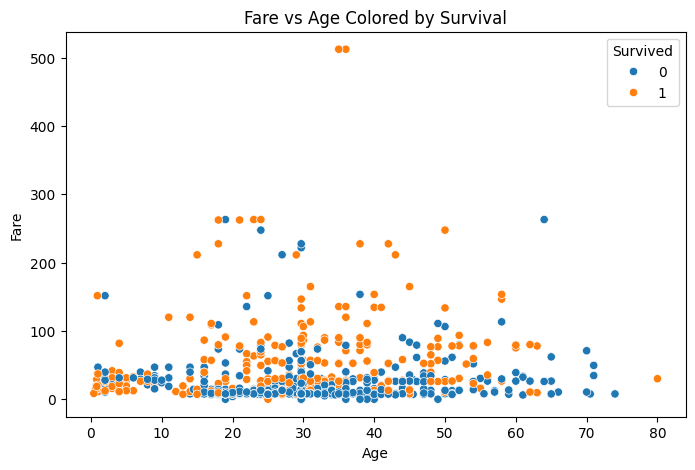

In [ ]:
# 📊 Visualization: Fare vs Age Scatterplot
plt.figure(figsize=(8,5))
sns.scatterplot(data=titanic_df, x='Age', y='Fare', hue='Survived')
plt.title('Fare vs Age Colored by Survival')
plt.show()


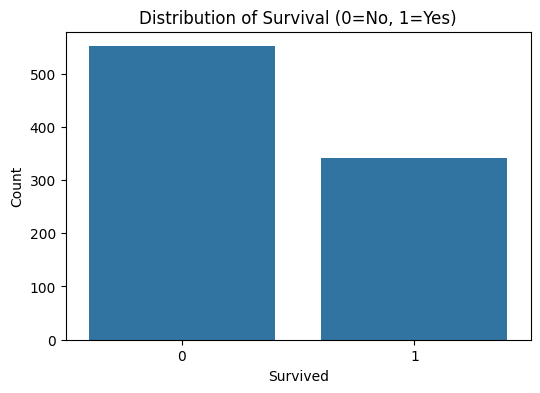

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=titanic_df, x='Survived')
plt.title('Distribution of Survival (0=No, 1=Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

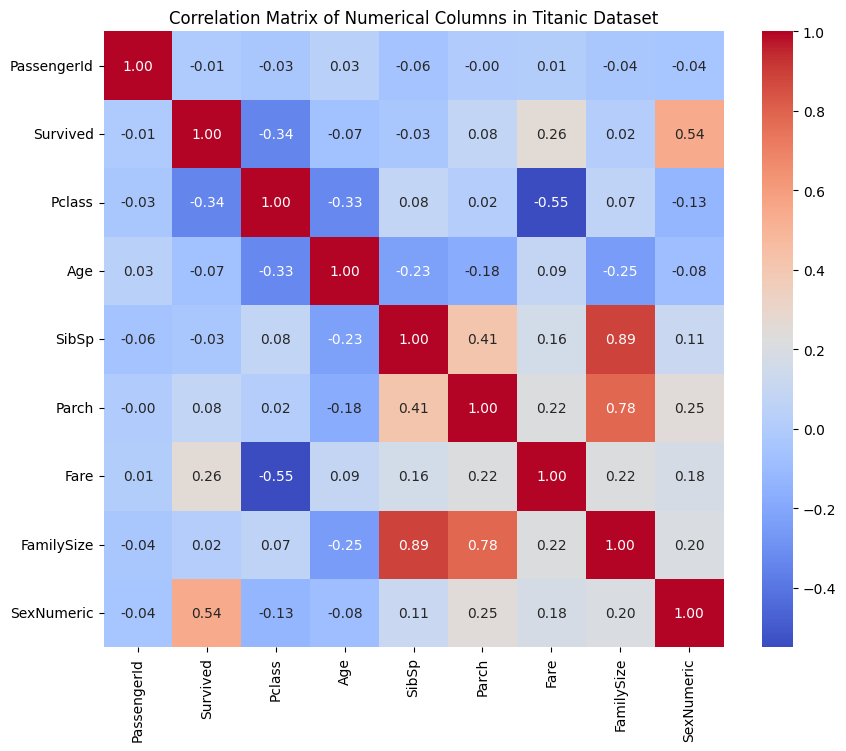

In [ ]:
# Select only numerical columns
numerical_df = titanic_df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns in Titanic Dataset')
plt.show()